In [623]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('../')
import matplotlib.pyplot as plt
import numpy as np
import astropy.units as u
from astropy.cosmology import LambdaCDM
from astropy.cosmology import w0waCDM

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [624]:
z = np.linspace(0, 3, 1000)
c = 299792.458  # Speed of light in km/s
rd = 147.05 # Sound horizon at drag epoch in Mpc
Zdat = np.loadtxt('/Users/matteocicirello/Desktop/astrocosmolib/demo/dati/redshiftdesi.txt')
ADESY = np.genfromtxt('/Users/matteocicirello/Desktop/astrocosmolib/demo/dati/PUNTI.txt')
ADESYDV_rd = ADESY[:, 0]
ADESYDM_rd = ADESY[:, 1]
ADESYDH_rd = ADESY[:, 2]
ADESYDV = ADESYDV_rd * rd
ADESYDM = ADESYDM_rd * rd
ADESYDH = ADESYDH_rd * rd


In [625]:
cosmo = LambdaCDM(H0=67.14, Om0=0.3169, Ode0=0.6831)
HF = cosmo.H(z)
DH = c / HF
DC = cosmo.comoving_distance(z)
DCDAT = cosmo.comoving_distance(Zdat)
DV = (z * DC**2 * DH)**(1/3)
DV_interp = np.interp(Zdat, z, DV)
DC_interp = np.interp(Zdat, z, DC)
DH_interp = np.interp(Zdat, z, DH)


In [626]:
cosmo1 = LambdaCDM(H0=68.173, Om0=0.3027, Ode0=0.6973)
HF1 = cosmo1.H(z)
DH1 = c / HF1
DC1 = cosmo1.comoving_distance(z)
DV1 = (z * DC1**2 * DH1)**(1/3)

In [627]:
cosmo2 = w0waCDM(H0=66.74, Om0=0.3191, Ode0=0.6809, w0=-0.752, wa=-0.86)
HF2 = cosmo2.H(z)
DH2 = c / HF2
DC2 = cosmo2.comoving_distance(z)
DV2 = (z * DC2**2 * DH2)**(1/3)

/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_26759/3370074807.py:7: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  axes[0].plot(Zdat, ADESYDV/DV_interp, 'bo', label = 'DESI ',color = 'gray')
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_26759/3370074807.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  axes[1].plot(Zdat, ADESYDM/DC_interp, 'bo', label = 'DESI ',color = 'gray')
/var/folders/63/3_tf2z012_54tw7489nrm_gc0000gn/T/ipykernel_26759/3370074807.py:33: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  axes[2].plot(Zdat, ADESYDH/DH_interp, 'bo', label = 'DESI ',color = 'gray')


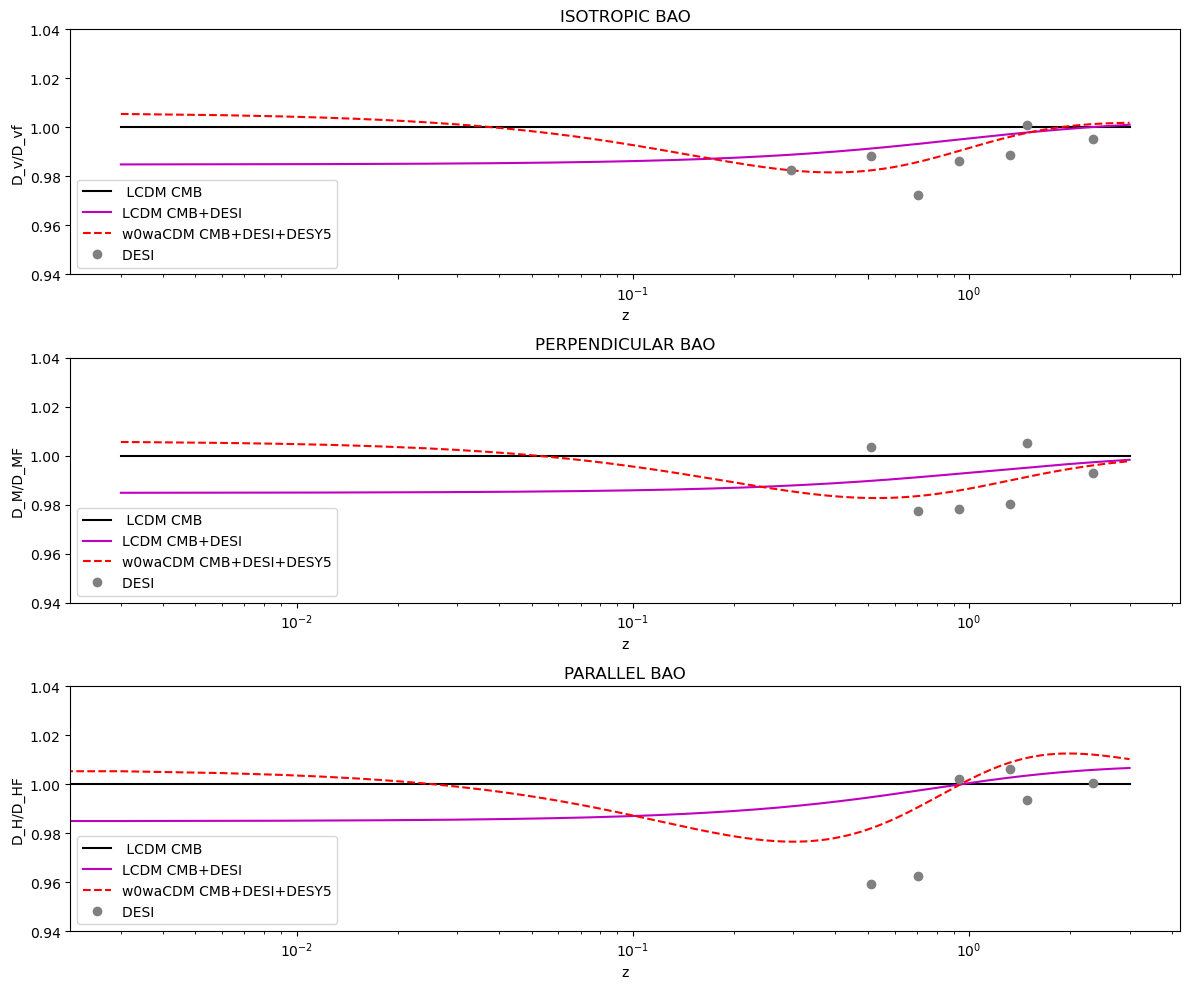

In [628]:
fig, axes = plt.subplots(3, 1, figsize=(12, 10))  # 1 righe, 3 colonne

# Primo grafico
axes[0].plot(z, DV/DV, 'k', label = ' LCDM CMB')
axes[0].plot(z, DV1/DV, 'm', label = 'LCDM CMB+DESI')
axes[0].plot(z, DV2/DV, 'r', linestyle='--' ,label = 'w0waCDM CMB+DESI+DESY5')
axes[0].plot(Zdat, ADESYDV/DV_interp, 'bo', label = 'DESI ',color = 'gray')
axes[0].set_xscale('log')
axes[0].set_xticks([0.02,0.1,0.5,1,3])
axes[0].set_yticks([0.94,0.96,0.98,1,1.02,1.04])
axes[0].legend()
axes[0].set_title("ISOTROPIC BAO")
axes[0].set_xlabel("z")
axes[0].set_ylabel("D_v/D_vf")

# Secondo grafico
axes[1].plot(z, DC/DC, 'k', label = ' LCDM CMB')
axes[1].plot(z, DC1/DC, 'm', label = 'LCDM CMB+DESI')
axes[1].plot(z, DC2/DC, 'r', linestyle='--',label = 'w0waCDM CMB+DESI+DESY5')
axes[1].plot(Zdat, ADESYDM/DC_interp, 'bo', label = 'DESI ',color = 'gray')
axes[1].set_xticks([0.02,0.1,0.5,1,3])
axes[1].set_yticks([0.94,0.96,0.98,1,1.02,1.04])
axes[1].set_xscale('log')
axes[1].set_title("PERPENDICULAR BAO")
axes[1].set_xlabel("z")
axes[1].set_ylabel("D_M/D_MF")
axes[1].legend()

# Terzo grafico
axes[2].plot(z, DH/DH, 'k', label = ' LCDM CMB')
axes[2].plot(z, DH1/DH, 'm', label = 'LCDM CMB+DESI')
axes[2].plot(z, DH2/DH, 'r', linestyle='--', label = 'w0waCDM CMB+DESI+DESY5')
axes[2].plot(Zdat, ADESYDH/DH_interp, 'bo', label = 'DESI ',color = 'gray')
axes[2].set_xticks([0.02,0.1,0.5,1,3])
axes[2].set_yticks([0.94,0.96,0.98,1,1.02,1.04])
axes[2].set_xscale('log')
axes[2].set_title("PARALLEL BAO")
axes[2].set_xlabel("z")
axes[2].set_ylabel("D_H/D_HF")
axes[2].legend()
#mostra i grafici
plt.tight_layout()
plt.show()